In [12]:
import numpy as np
import os
import glob
import pandas as pd
from astropy.io import fits
from datetime import timedelta, date
from datetime import datetime
from alive_progress import alive_bar
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#--------------------------------------------------------------------
# Functions
#--------------------------------------------------------------------
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days +1)):
        yield start_date + timedelta(n)

#--------------------------------------------------------------------
# Read CCFs
#--------------------------------------------------------------------
quality_df  = pd.read_csv('combined_rvs_1.csv')
filenames   = [quality_df['Filename'][i][-27:] for i in range(len(quality_df))]
path_prefix = '/gpfs/group/ebf11/default/pipeline/data/neid_solar/v1.1/outputs/jvz5625/'


2020-06-24


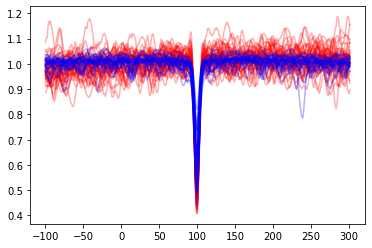

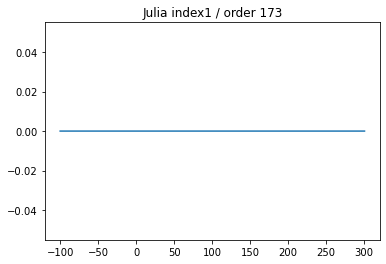

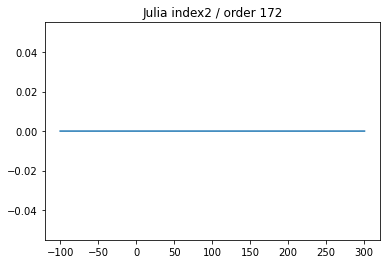

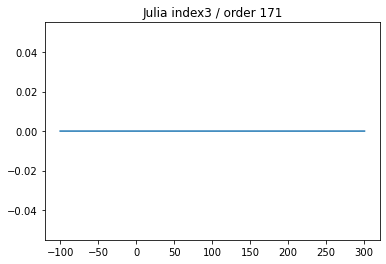

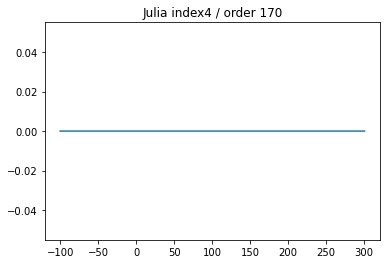

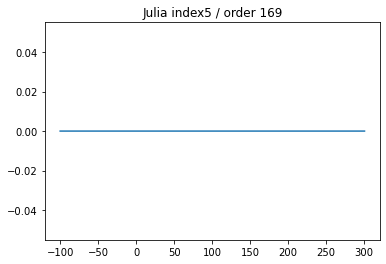

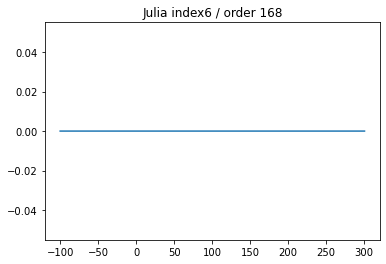

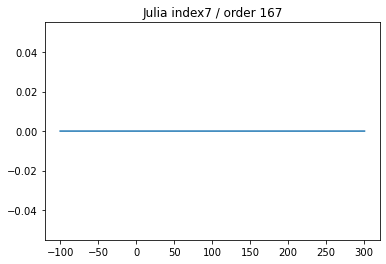

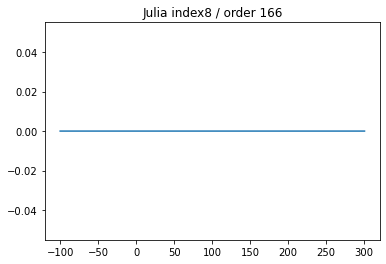

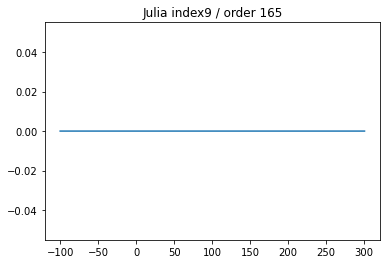

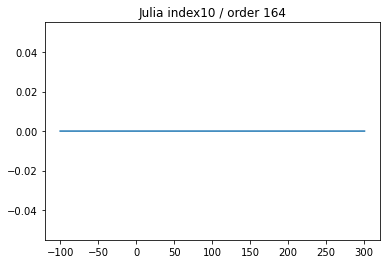

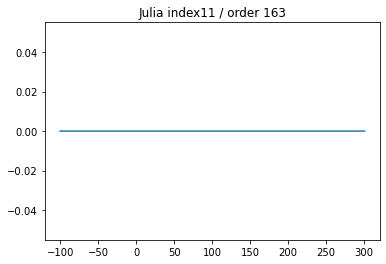

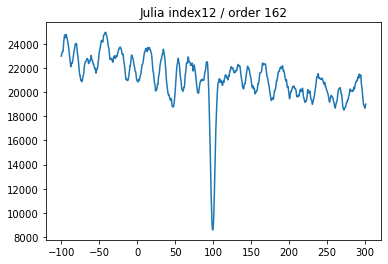

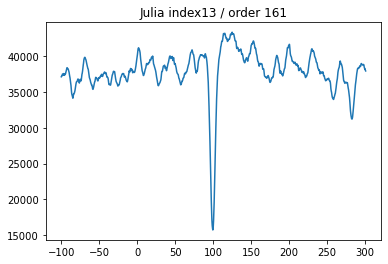

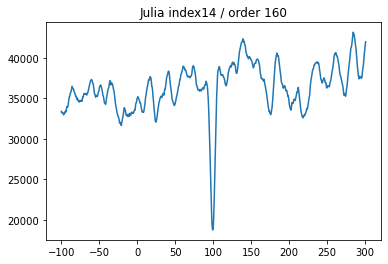

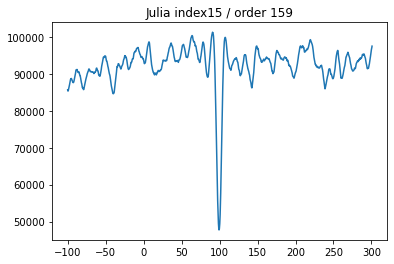

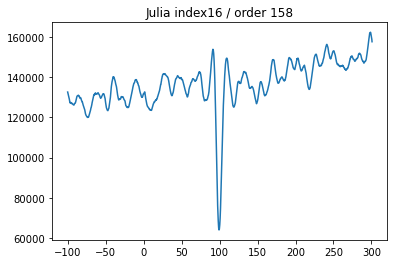

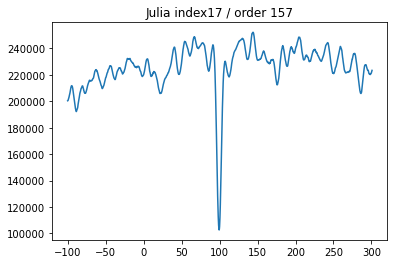

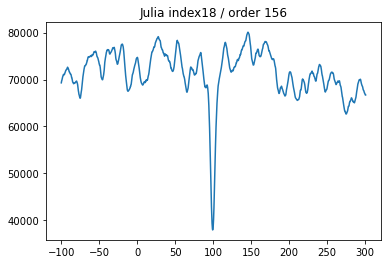

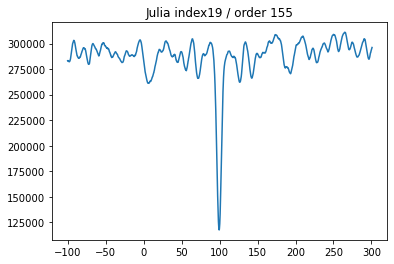

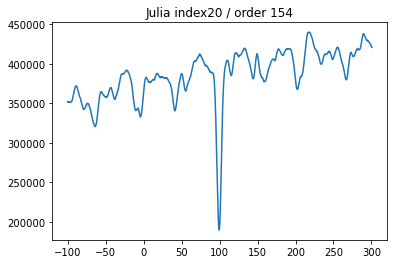

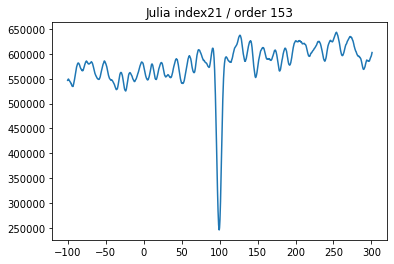

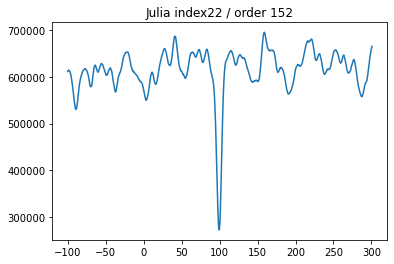

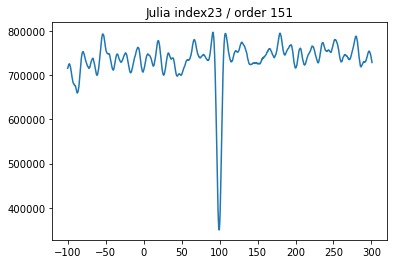

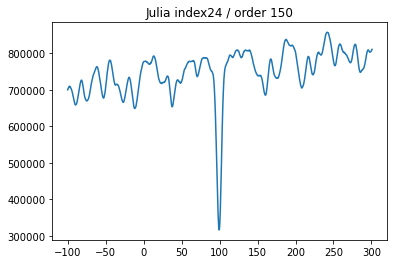

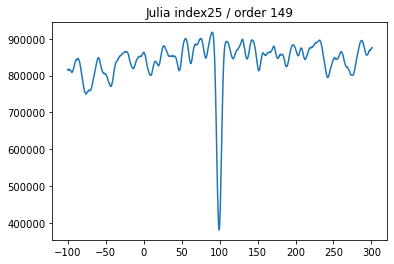

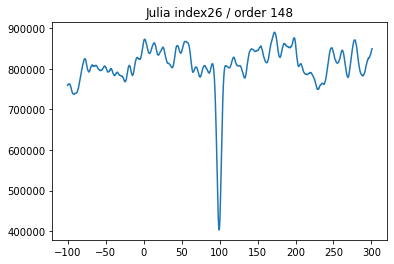

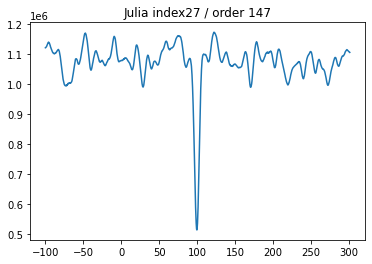

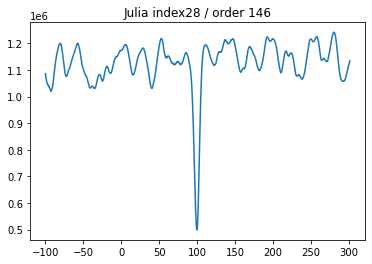

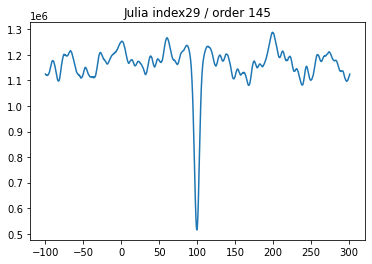

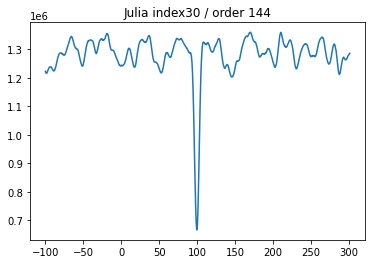

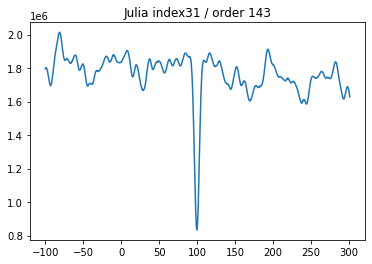

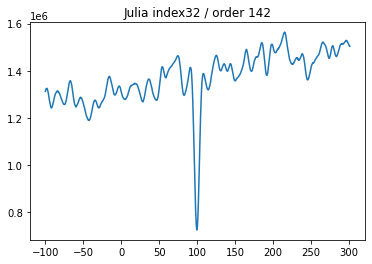

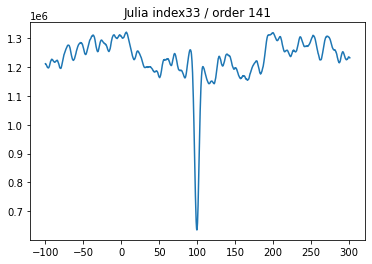

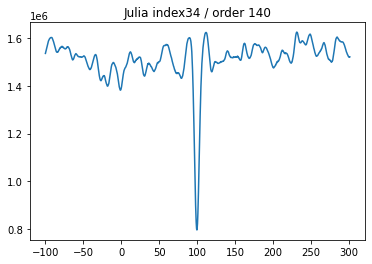

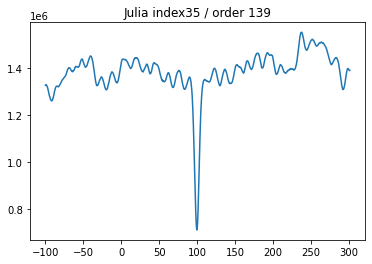

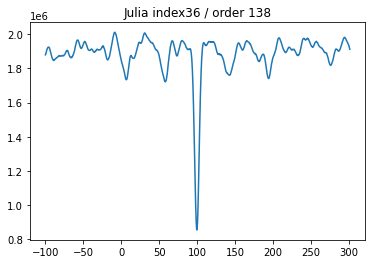

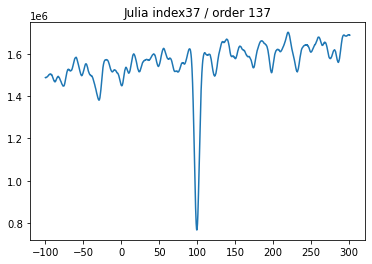

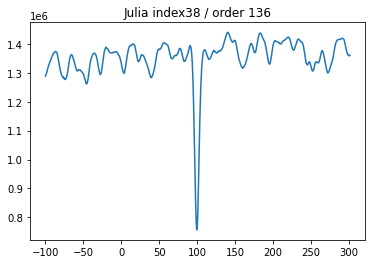

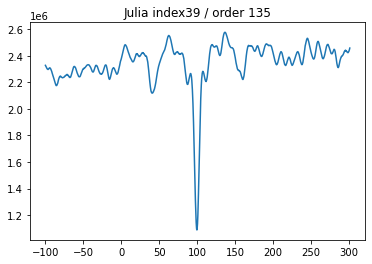

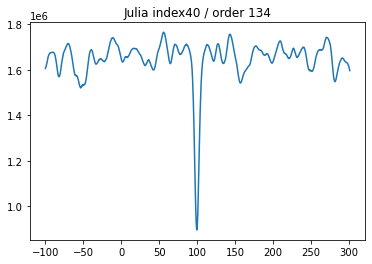

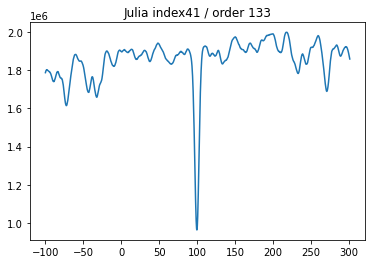

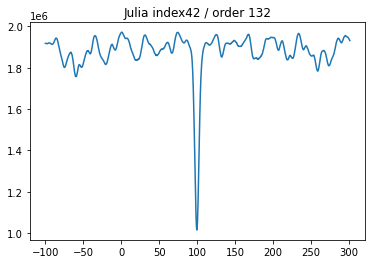

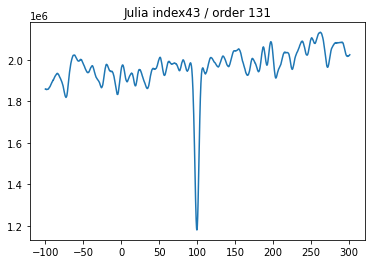

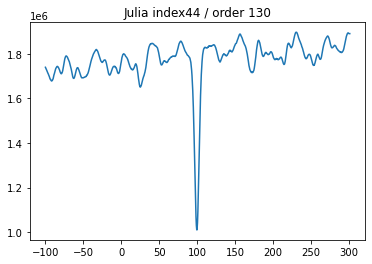

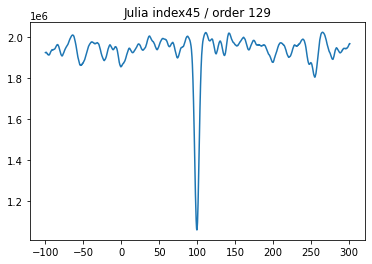

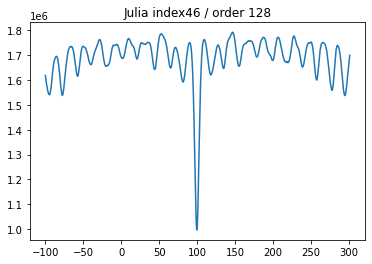

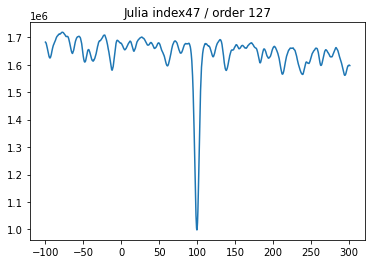

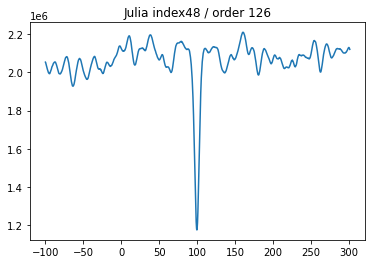

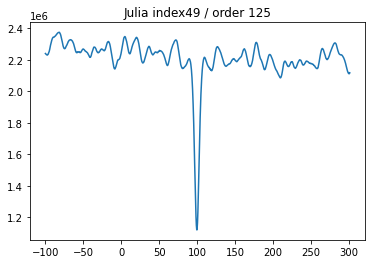

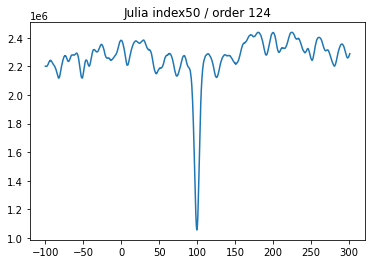

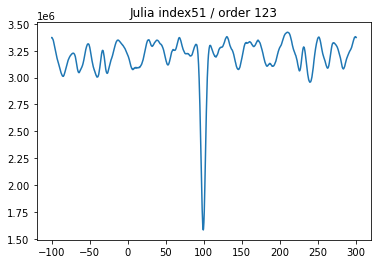

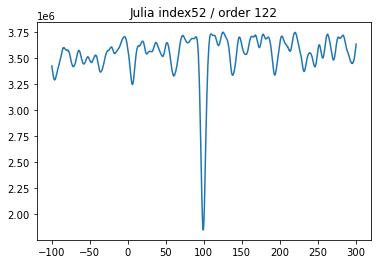

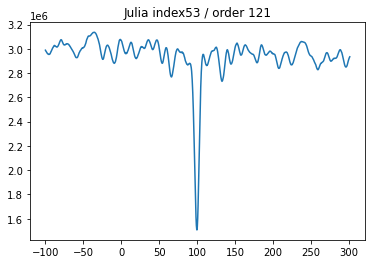

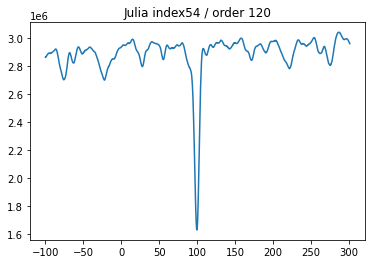

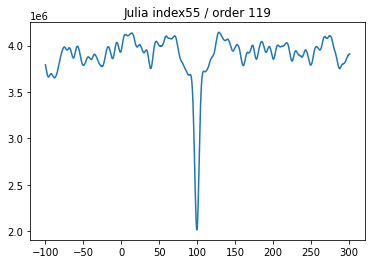

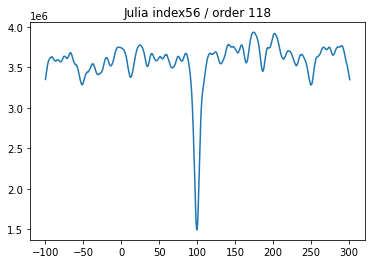

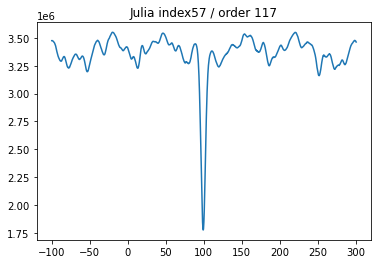

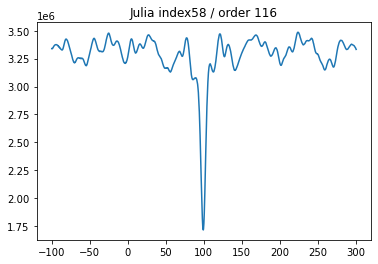

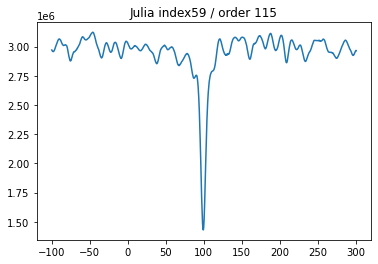

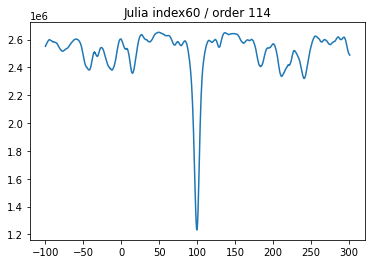

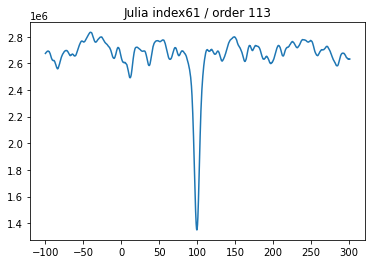

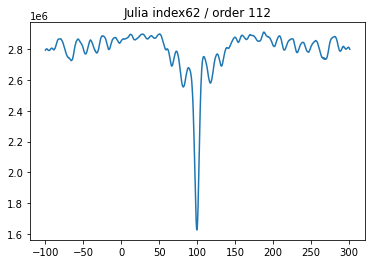

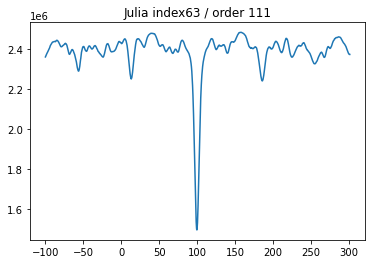

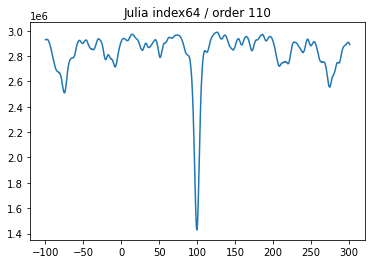

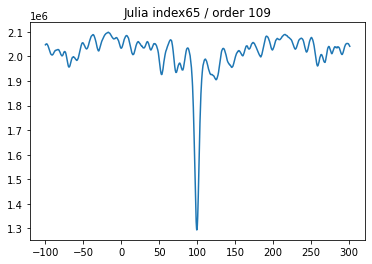

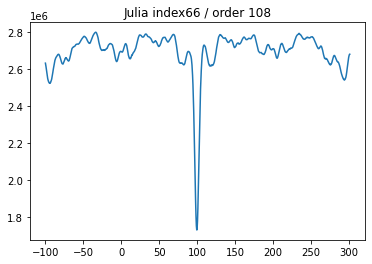

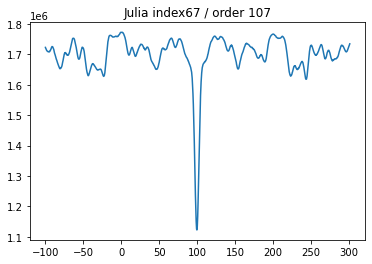

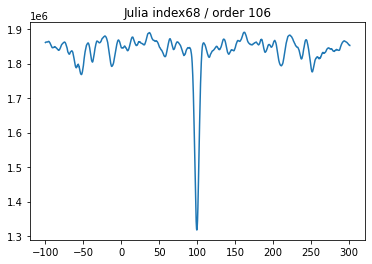

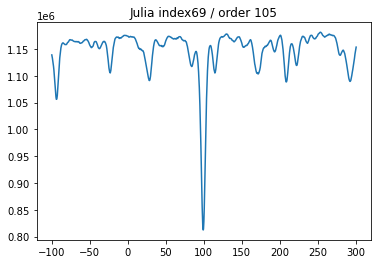

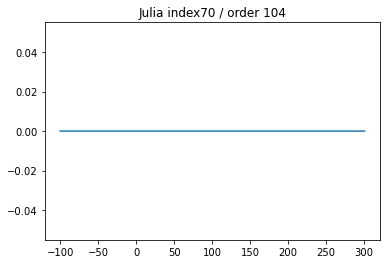

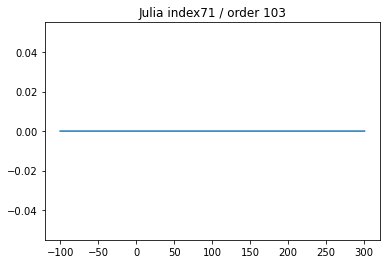

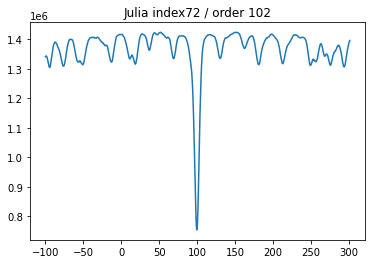

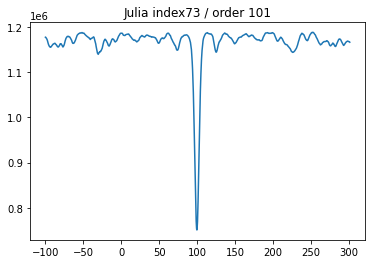

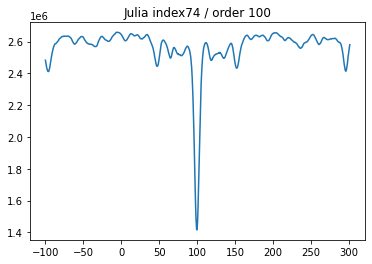

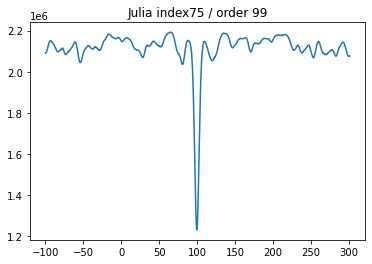

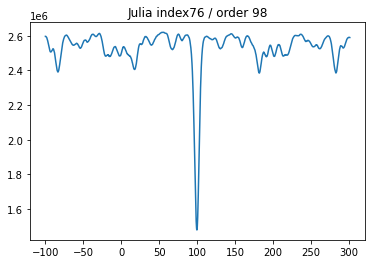

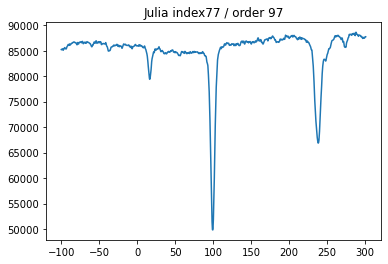

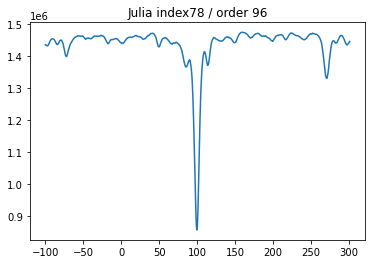

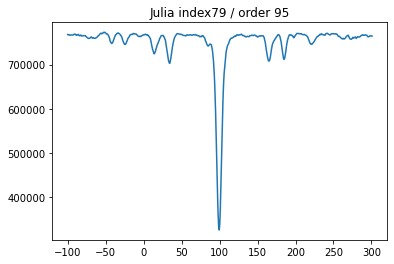

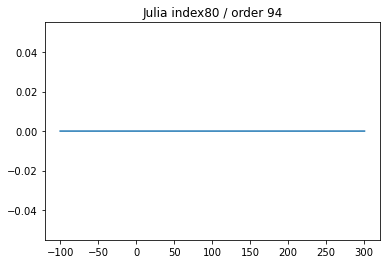

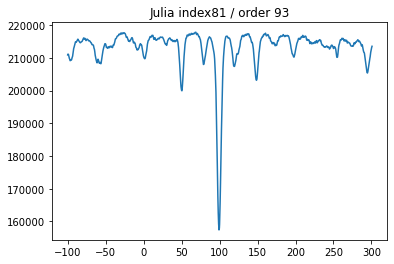

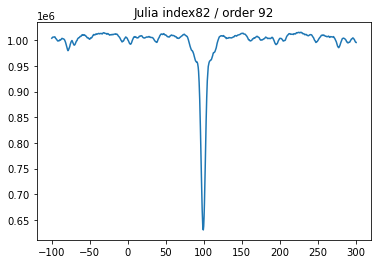

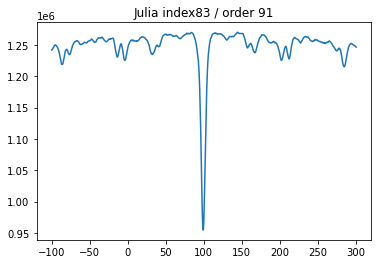

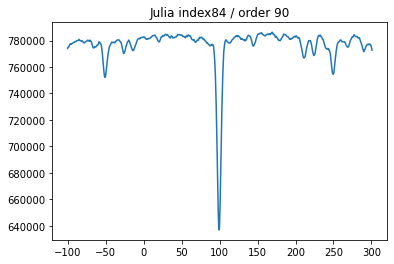

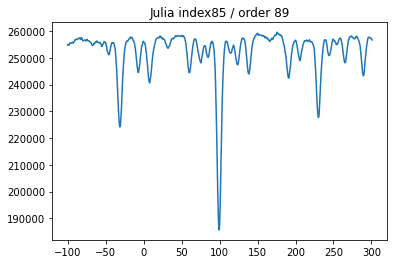

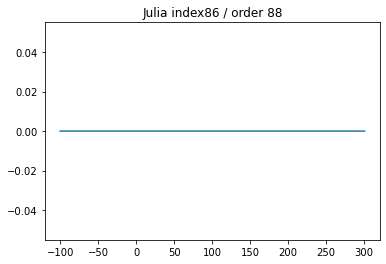

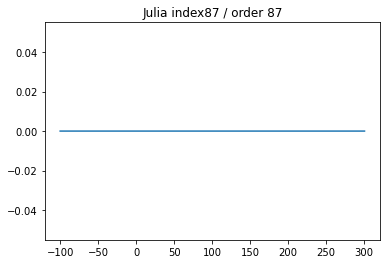

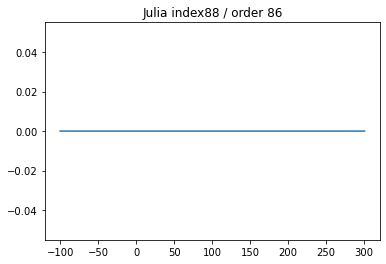

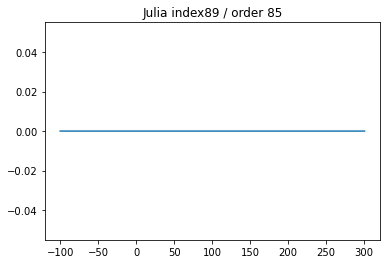

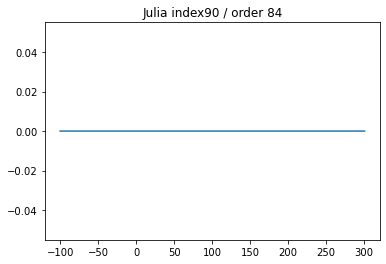

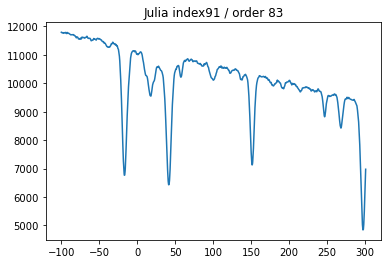

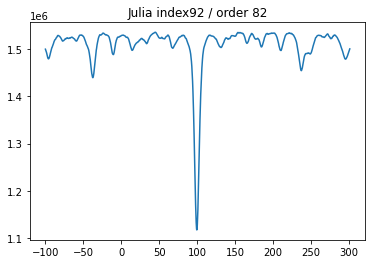

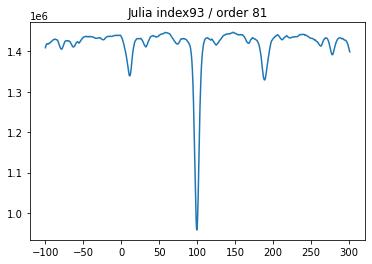

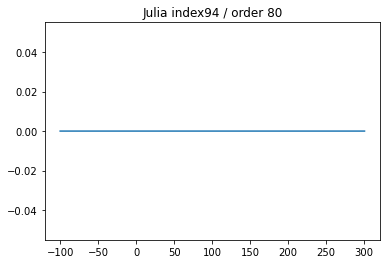

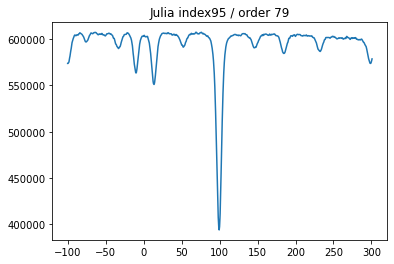

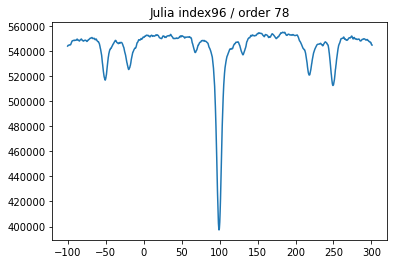

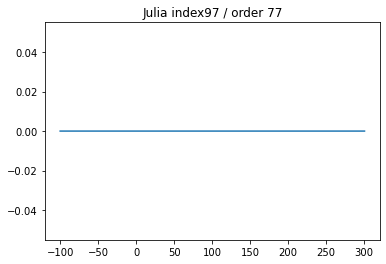

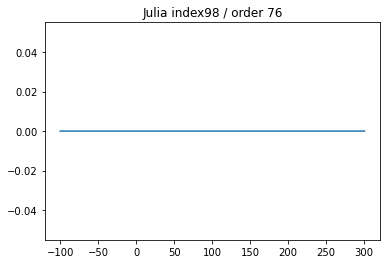

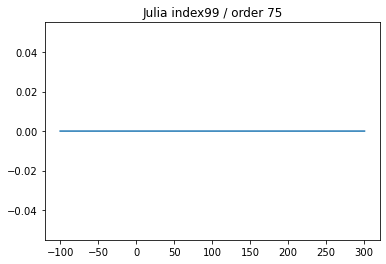

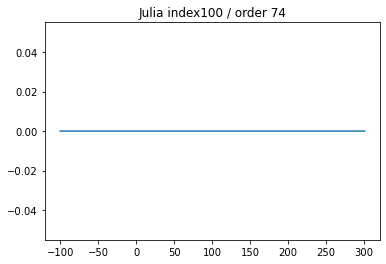

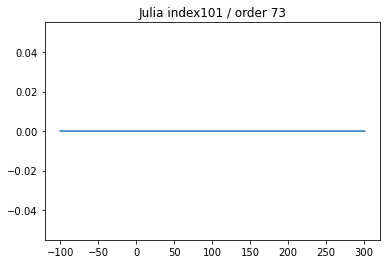

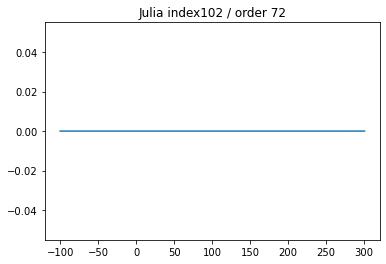

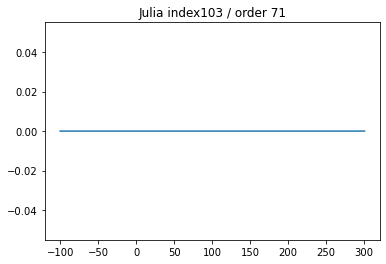

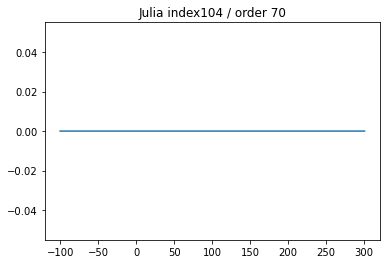

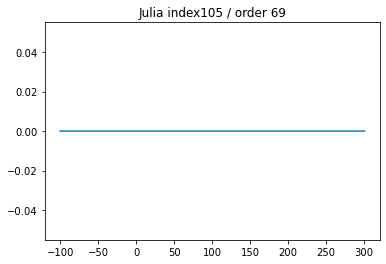

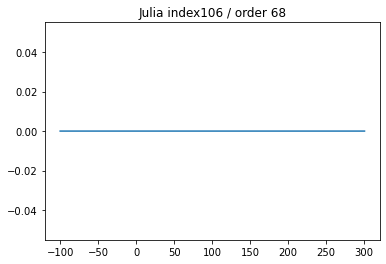

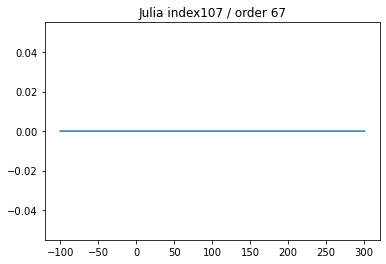

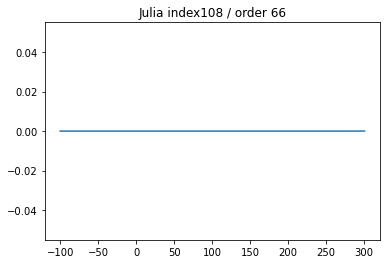

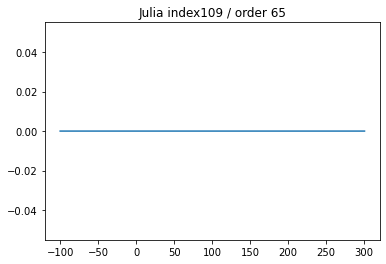

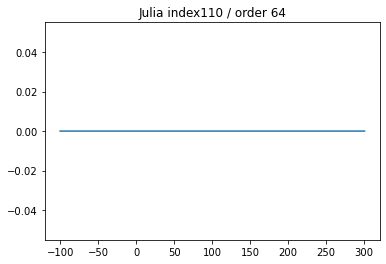

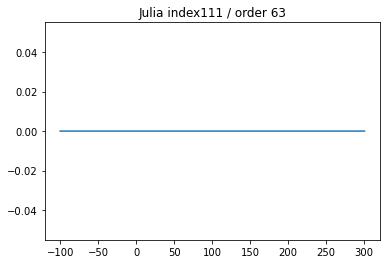

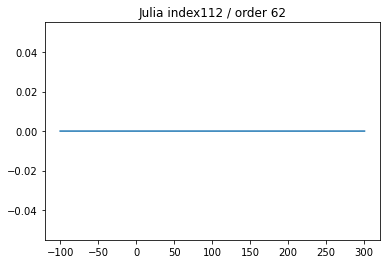

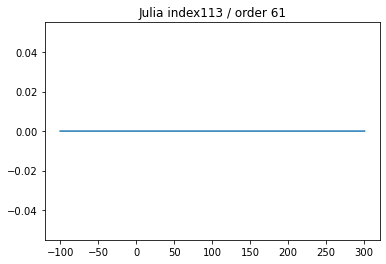

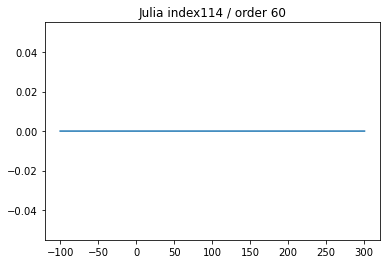

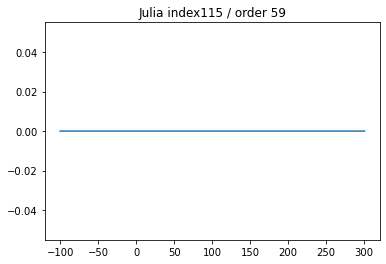

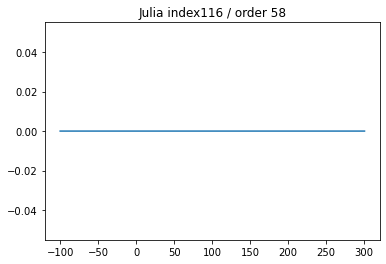

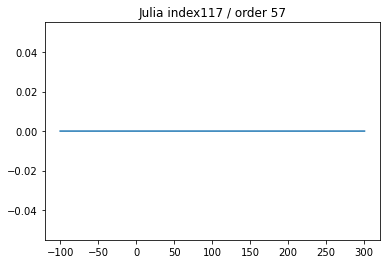

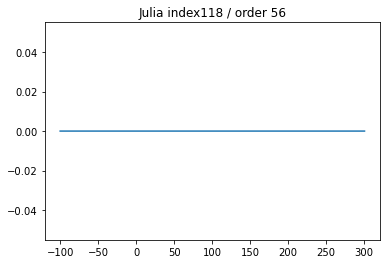

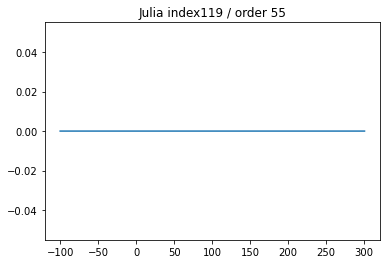

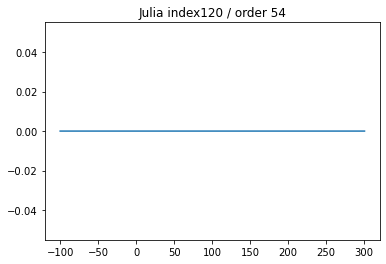

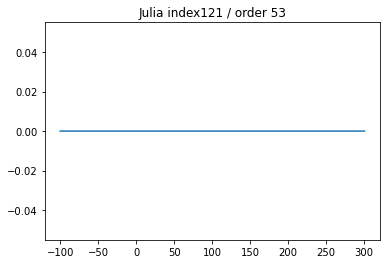

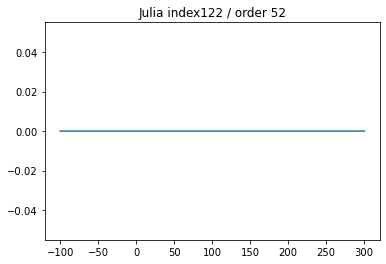

|████████████████████████████████████████| 53/53 [100%] in 29.7s (1.79/s)


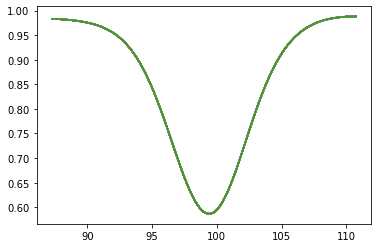

In [71]:
start_date  = date(2020, 6, 24)
end_date    = date(2020, 6, 24)

plot        = True
o_start     = 55    # 56 in Julia
o_end       = 108   # 108 in m
# o_exclude   = np.array([61, 66, 81, 90]) -> version 1
o_exclude   = 173 - np.array([66, 67, 68, 74, 76, 83, 118]) # version 2; index starting from 0
o_used      = np.array([x for x in np.arange(o_start, o_end) if (x in o_exclude) == False])


v_grid      = -100 + np.arange(ccf_per_order.shape[1])*0.25
idx_v       = (v_grid>87) & (v_grid<111)


CCF, σ_CCF                      = [], []
bjd, rv, σrv                    = np.array([]), np.array([]), np.array([])
CCF_daily, σ_CCF_daily          = [], []
bjd_daily, rv_daily, σrv_daily  = np.array([]), np.array([]), np.array([])

start_time  = datetime.now()
for single_date in daterange(start_date, end_date):

    print(single_date.strftime("%Y-%m-%d"))

    path        = path_prefix + single_date.strftime('extracted_ccf/%m/%d/')
    file_ccf    = sorted(glob.glob(path + '/*.ccf')) 
    N_file      = len(file_ccf)

    path_save   = path_prefix + single_date.strftime('ccf_by_obs_56_108/%m/%d/')
    if not os.path.exists(path_save):
        os.makedirs(path_save)

    if N_file != 0:

        with alive_bar(N_file) as bar:

            for n in range(N_file):
                ccf_per_order   = np.loadtxt(file_ccf[n])

                for order in o_used:
                    if ccf_per_order[order, :].all() == 0:
                        continue
                    else:
                        reg                     = LinearRegression().fit(v_grid[~idx_v].reshape(-1,1), ccf_per_order[order, ~idx_v])
                        fitted_continuum        = reg.predict(v_grid.reshape(-1,1))
                        ccf_per_order[order, :] = ccf_per_order[order, :] / fitted_continuum * np.median(fitted_continuum)

                ccf_per_obs   = np.sum(ccf_per_order[o_used, :], axis=0)

                # np.savetxt(path_save + file_ccf[n][-27:-4] + '.ccf', ccf_per_obs)

                if not np.any(CCF):
                    CCF = ccf_per_obs #(1604,)
                else:
                    CCF = np.vstack((CCF, ccf_per_obs)) # e.g.(53, 1604)

                df      = quality_df[quality_df['Filename'].str.contains(file_ccf[n][-26:-4])]
                bjd     = np.append(bjd, df['jd_drp'])
                rv      = np.append(rv, df['rv_drp']*1000)
                σrv     = np.append(σrv, df['σrv_drp']*1000)

                bar()

                if (n==0) & (plot==True): # only plot once
                
                    ccf_per_order_reject = np.vstack((ccf_per_order[0:o_start, :], ccf_per_order[o_end:, :]))
                    continuum   = np.mean(ccf_per_order_reject, axis=1)
                    idx         = (continuum!=0)
                    plt.plot(v_grid, ccf_per_order_reject[idx,:].T/continuum[idx], 'r', alpha=0.3)

                    continuum   = np.mean(ccf_per_order[o_used, :], axis=1)
                    idx         = (continuum!=0)
                    plt.plot(v_grid, ccf_per_order[o_used, :][idx,:].T/continuum[idx], 'b', alpha=0.3)
                    plt.show()

                    for i in range(ccf_per_order.shape[0]):
                        plt.plot(v_grid, ccf_per_order[i,:])
                        plt.title('Julia index' + str(i+1) + ' / order ' + str(174-i-1))
                        plt.show()

# save the normalised ccfs into file 
σ_CCF   = (CCF.T**0.5 / np.median(CCF[:,~idx_v], axis=1)).T
CCF     = (CCF.T / np.median(CCF[:,~idx_v], axis=1)).T[:,idx_v] # normalisation 

# np.savetxt(path_prefix + single_date.strftime("ccf_by_day_56_108/%Y-%m-%d.CCF"), ccf_daily)

plt.plot(v_grid[idx_v], CCF.T)
plt.show()

2020-06-23
|████████████████████████████████████████| 2/2 [100%] in 0.4s (5.48/s)
Duration: 0:00:00.369174


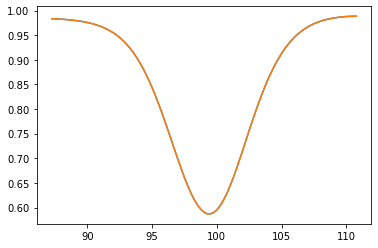

In [73]:
import numpy as np
import os
import glob
import pandas as pd
from astropy.io import fits
from datetime import timedelta, date
from datetime import datetime
from alive_progress import alive_bar
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#--------------------------------------------------------------------
# Functions
#--------------------------------------------------------------------
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days +1)):
        yield start_date + timedelta(n)

#--------------------------------------------------------------------
# Read CCFs
#--------------------------------------------------------------------
quality_df  = pd.read_csv('combined_rvs_1.csv')
filenames   = [quality_df['Filename'][i][-27:] for i in range(len(quality_df))]
path_prefix = '/gpfs/group/ebf11/default/pipeline/data/neid_solar/v1.1/outputs/jvz5625/'

# parameters 
# start_date  = date(2020, 5, 26)
# end_date    = date(2020, 6, 25)
start_date  = date(2020, 6, 23)
end_date    = date(2020, 6, 23)
# start_date  = date(2020, 2, 14)
# end_date    = date(2020, 12, 31)

plot        = False
o_start     = 55    # 56 in Julia
o_end       = 108   # 108 in julia
# o_exclude   = np.array([61, 66, 81, 90]) -> version 1
o_exclude   = 173 - np.array([66, 67, 68, 74, 76, 83, 118]) # version 2; index starting from 0
o_used      = np.array([x for x in np.arange(o_start, o_end) if (x in o_exclude) == False])

v_grid      = -100 + np.arange(ccf_per_order.shape[1])*0.25
idx_v       = (v_grid>87) & (v_grid<111)

CCF, σ_CCF                      = [], []
bjd, rv, σrv                    = np.array([]), np.array([]), np.array([])
CCF_daily, σ_CCF_daily          = [], []
bjd_daily, rv_daily, σrv_daily  = np.array([]), np.array([]), np.array([])

start_time  = datetime.now()
for single_date in daterange(start_date, end_date):

    print(single_date.strftime("%Y-%m-%d"))

    path        = path_prefix + single_date.strftime('extracted_ccf/%m/%d/')
    file_ccf    = sorted(glob.glob(path + '/*.ccf')) 
    N_file      = len(file_ccf)

    # path_save   = path_prefix + single_date.strftime('ccf_by_obs_56_108/%m/%d/')
    # if not os.path.exists(path_save):
    #     os.makedirs(path_save)

    if N_file != 0:

        with alive_bar(N_file) as bar:

            for n in range(N_file):
                ccf_per_order   = np.loadtxt(file_ccf[n])

                for order in o_used:
                    if ccf_per_order[order, :].all() == 0:
                        continue
                    else:
                        reg                     = LinearRegression().fit(v_grid[~idx_v].reshape(-1,1), ccf_per_order[order, ~idx_v])
                        fitted_continuum        = reg.predict(v_grid.reshape(-1,1))
                        ccf_per_order[order, :] = ccf_per_order[order, :] / fitted_continuum * np.median(fitted_continuum)

                ccf_per_obs   = np.sum(ccf_per_order[o_used, :], axis=0)

                # np.savetxt(path_save + file_ccf[n][-27:-4] + '.ccf', ccf_per_obs)

                if not np.any(CCF):
                    CCF = ccf_per_obs #(1604,)
                else:
                    CCF = np.vstack((CCF, ccf_per_obs)) # e.g.(53, 1604)

                df      = quality_df[quality_df['Filename'].str.contains(file_ccf[n][-26:-4])]
                bjd     = np.append(bjd, df['jd_drp'])
                rv      = np.append(rv, df['rv_drp']*1000)
                σrv     = np.append(σrv, df['σrv_drp']*1000)

                bar()

                if (n==0) & (plot==True): # only plot once
                
                    ccf_per_order_reject = np.vstack((ccf_per_order[0:o_start, :], ccf_per_order[o_end:, :]))
                    continuum   = np.mean(ccf_per_order_reject, axis=1)
                    idx         = (continuum!=0)
                    plt.plot(v_grid, ccf_per_order_reject[idx,:].T/continuum[idx], 'r', alpha=0.3)

                    continuum   = np.mean(ccf_per_order[o_used, :], axis=1)
                    idx         = (continuum!=0)
                    plt.plot(v_grid, ccf_per_order[o_used, :][idx,:].T/continuum[idx], 'b', alpha=0.3)
                    plt.show()

                    for i in range(ccf_per_order.shape[0]):
                        plt.plot(v_grid, ccf_per_order[i,:])
                        plt.title('Julia index' + str(i+1) + ' / order ' + str(174-i-1))
                        plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

#----------------------------------
# Save data
#----------------------------------
σ_CCF   = (CCF.T**0.5 / np.median(CCF[:,~idx_v], axis=1)).T
CCF     = (CCF.T / np.median(CCF[:,~idx_v], axis=1)).T[:,idx_v] # normalisation 

np.savetxt('./data/v_grid.txt', v_grid)
np.savetxt('./data/CCF.txt', CCF)
np.savetxt('./data/σ_CCF.txt', σ_CCF)
np.savetxt('./data/bjd.txt', bjd)
np.savetxt('./data/rv.txt', rv)
np.savetxt('./data/σrv.txt', σrv)

plt.plot(v_grid[idx_v], CCF.T)
plt.show()

plt.close('all')

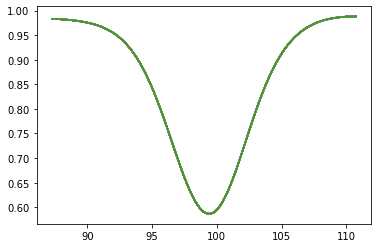

In [70]:
plt.plot(v_grid[idx_v], CCF.T)
plt.show()

In [46]:
CCF.shape

(53, 1604)

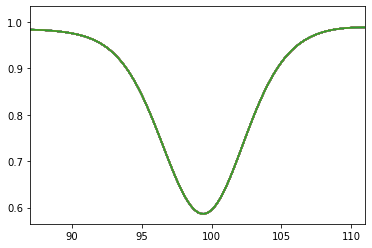

In [50]:
        if plot==True:
            plt.plot(v_grid, CCF.T / np.median(CCF[:,~idx_v], axis=1))
            plt.xlim(87,111)
            plt.show()

In [58]:
CCF_nor = (CCF.T / np.median(CCF[:,~idx_v], axis=1))

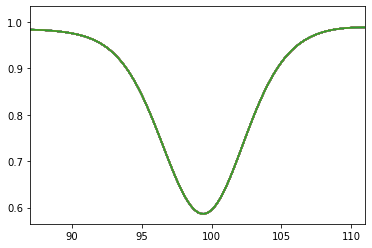

In [59]:
plt.plot(v_grid, CCF_nor)
plt.xlim(87,111)
plt.show()

In [60]:
CCF_nor.shape

(1604, 53)

In [61]:
(CCF.T / np.median(CCF[:,~idx_v], axis=1)).T.shape

(53, 1604)

In [63]:
(CCF.T / np.median(CCF[:,~idx_v], axis=1)).T[:,idx_v].shape

(53, 95)

In [74]:
ccf_per_order.shape[1]

1604